
# DeepLabCut Toolbox

https://github.com/AlexEMG/DeepLabCut

A Mathis, alexander.mathis@bethgelab.org & M Mathis, mackenzie@post.harvard.edu

## Step 1:

A key point is to select diverse frames, which are typical for the behavior you study that should be labeled. This helper script selects N frames uniformly sampled from a particular video. Ideally you would also get data from different session and different animals if those vary substantially. Note: this might not yield diverse frames, if the behavior is sparsely distributed.

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the video as much as possible. 

If color information is not essential for your task, then store iamges as greyscale images. This will make the memory load of the network smaller.


In [1]:
import imageio 
imageio.plugins.ffmpeg.download() 

In [2]:
#Dependencies: 

%matplotlib inline
import imageio
imageio.plugins.ffmpeg.download()
import matplotlib
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from skimage import io
from skimage.util import img_as_ubyte
import numpy as np
import os, math,sys
sys.path.append(os.getcwd().split('Generating_a_Training_Set')[0])
from myconfig import Task, vidpath, filename, x1, x2, y1, y2, portion, \
    Scorers, bodyparts, date
import auxiliaryfunctions

In [3]:
# check global variablesfrom myconfig file.
print(Task)
print(filename)
print(bodyparts)
print(Scorers)
print(date)

moving
video_2.mp4
['knee']
['camila']
May02


In [4]:
#Create base folder, which will contain frames from multiple videos for one labeling task.
basefolder='data-'+Task+'/'
auxiliaryfunctions.attempttomakefolder(basefolder)

('Duration of video [s], ', 14.78, 'fps, ', 23.976023976023978, 'Cropped frame dimensions: ', [640, 360])
('Duration of video [s]: ', 14.78, 'fps: ', 23.976023976023978, 'Cropped frame dimensions: ', (640, 360))


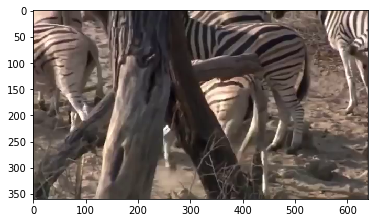

--> Open CroppingOK?.png file to set the output! <---
--> Open CroppingOK.png file to set the output range! <---
--> Adjust shiftx, shifty, fx and fy accordingly! <---


In [5]:
#####################################################################
######## First load the image and crop (if necessary). 
#####################################################################

## Number of frames to pick (set this to 1 until you found right cropping)
numframes2pick=1

clip = VideoFileClip(vidpath+'/'+filename)
print("Duration of video [s], ", clip.duration, "fps, ", clip.fps, "Cropped frame dimensions: ", clip.size)

ny,nx=clip.size #dimensions of frame (width, height)

# Select ROI of interest by adjusting values in myconfig.py
clip=clip.crop(y1=y1,y2=y2,x1 = x1,x2=x2)

'''
USAGE:
    
clip.crop(x1=None, y1=None, x2=None, y2=None, width=None, height=None, x_center=None, y_center=None)

Returns a new clip in which just a rectangular subregion of the
original clip is conserved. x1,y1 indicates the top left corner and
x2,y2 is the lower right corner of the croped region.

All coordinates are in pixels. Float numbers are accepted.

'''
print("Duration of video [s]: ", clip.duration, "fps: ", clip.fps, "Cropped frame dimensions: ", clip.size)


image = clip.get_frame(1.2)
io.imsave("IsCroppingOK.png", image) 

plt.imshow(image)
plt.show()


print("--> Open CroppingOK?.png file to set the output! <---")
print("--> Open CroppingOK.png file to set the output range! <---")
print("--> Adjust shiftx, shifty, fx and fy accordingly! <---")

## If you are happy with the cropping, proceed to extract frames, 


In [6]:
numframes2pick= 20;

####################################################
######## Creating folder with name of experiment and extract random frames
####################################################

print("Videoname: ", filename)
folder=filename.split('.')[0]
auxiliaryfunctions.attempttomakefolder(basefolder+folder)

frames=np.random.randint(math.floor(clip.duration*clip.fps),size=numframes2pick-1)
width=int(np.ceil(np.log10(clip.duration/clip.fps))) 

for index in frames:
    try:
        image=img_as_ubyte(clip.get_frame(index*1./clip.fps))
        io.imsave(basefolder+folder+"/img"+str(index).zfill(width)+".png",image)
    except:
        print("Frame # ", index, " does not exist.")

######## Extract the first frame (not cropped!) - useful for data augmentation 

clip = VideoFileClip(vidpath+'/'+filename)
index=0
image=img_as_ubyte(clip.get_frame(index*1./clip.fps))
io.imsave(basefolder+folder+"/img"+str(index).zfill(width)+".png",image)


('Videoname: ', 'video_2.mp4')


## Now go label the frames (they are in the folder you specified!) in Fiji!

In Fiji one can simply open the images, create a (virtual) stack (In fiji: File > Import > Image Sequence > (check "virtual stack")), then use the "Multi-point Tool" to label frames 